This notebook demonstrates a phenotype simulation pipeline by simulating phenotypes for 200 individuals through two main approaches: univariate and multivariate. The univariate simulation uses a normal distribution model with 1,000 causal mutations, applying heritability of 0.33 to partition genetic and environmental contributions to the phenotype, with options to normalize genetic values and output standardized results to files. The multivariate simulation demonstrates simulating two correlated phenotypes simultaneously using a multivariate normal model with 10,000 causal mutations and a user-defined covariance structure, allowing for genetic correlation between traits. Throughout the process, the code assigns random effect sizes to mutations from specified distributions, calculates genetic values for each individual based on their mutations, adds environmental noise, and produces final phenotype values that can be saved in various formats for downstream analysis.

In [ ]:
import numpy as np
import pygrgl
import matplotlib.pyplot as plt 

from grg_pheno_sim.phenotype import sim_phenotypes
from grg_pheno_sim.model import grg_causal_mutation_model


The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation. The bash script below will function as expected given the relative path for the source data file is accurate.

In [2]:
%%script bash --out /dev/null
if [ ! -f test-200-samples.grg ]; then
  grg construct -p 10 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg
fi

Construction took 63 ms
Wrote GRG to test-200-samples.vcf.gz.part0.tree0.grg in 0 ms
Construction took 0 ms
Mapping mutations took227 ms
Wrote GRG to test-200-samples.vcf.gz.part0.grg in 1 ms
Construction took 68 ms
Wrote GRG to test-200-samples.vcf.gz.part1.tree0.grg in 0 ms
Construction took 0 ms
Mapping mutations took282 ms
Wrote GRG to test-200-samples.vcf.gz.part1.grg in 1 ms
Construction took 67 ms
Wrote GRG to test-200-samples.vcf.gz.part2.tree0.grg in 0 ms
Construction took 0 ms
Mapping mutations took352 ms
Wrote GRG to test-200-samples.vcf.gz.part2.grg in 1 ms
Construction took 76 ms
Wrote GRG to test-200-samples.vcf.gz.part3.tree0.grg in 0 ms
Construction took 0 ms
Mapping mutations took382 ms
Wrote GRG to test-200-samples.vcf.gz.part3.grg in 1 ms
Construction took 74 ms
Wrote GRG to test-200-samples.vcf.gz.part4.tree0.grg in 0 ms
Construction took 0 ms
Mapping mutations took410 ms
Wrote GRG to test-200-samples.vcf.gz.part4.grg in 1 ms
Construction took 74 ms
Wrote GRG to tes

This notebook contains demos where we combine all the stages of the phenotype simulator together to obtain final phenotypes in one go. The first demo uses the normal model for univariate simulation.

In [3]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

model_type = "normal"
mean = 0
var = 1

model = grg_causal_mutation_model(model_type, mean=mean, var=var)

num_causal = 1000

random_seed = 1

normalize_phenotype = True #set value to true to normalize the final phenotypes

normalize_genetic_values_before_noise = True

heritability = 0.33

effect_output_required = True #saves the effect sizes data for each mutation node in a .par file

effect_path = 'univariate_sample_effect_sizes.par'

standardized_output = True

output_path = 'normal_pheno_normalized.phen' #define the path to be saved at, this output is saved in the file of this name in the same directory

header=True #set header parameter to true if column names are expected in output file
print(type(model))
phenotypes = sim_phenotypes(grg_1, model, num_causal, random_seed, normalize_phenotype=normalize_phenotype, normalize_genetic_values_before_noise=normalize_genetic_values_before_noise, heritability=heritability, save_effect_output=effect_output_required, effect_path=effect_path, standardized_output=standardized_output, path=output_path, header=header)


<class 'grg_pheno_sim.model.GRGCausalMutationModelNormal'>
The initial effect sizes are 
     mutation_id  effect_size  causal_mutation_id
0             20    -1.810258                   0
1             28     1.151768                   0
2             62     1.681257                   0
3             76     2.346698                   0
4            119    -0.286668                   0
..           ...          ...                 ...
995        10862    -0.221163                   0
996        10874    -1.136983                   0
997        10879    -0.966133                   0
998        10883    -1.402602                   0
999        10889    -0.483777                   0

[1000 rows x 3 columns]
The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0     -16.501664                   0
1                1      -2.454348                   0
2                2     -17.303803                   0
3                3       6.

In [4]:
phenotypes #normalized phenotypes

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.228373,1.036248,0.807875
1,0,1,0.417372,0.449374,0.866747
2,0,2,-0.265246,-1.429812,-1.695058
3,0,3,0.835489,-0.041145,0.794344
4,0,4,0.129795,0.678309,0.808103
...,...,...,...,...,...
195,0,195,1.106490,-0.055977,1.050513
196,0,196,1.290950,0.240824,1.531773
197,0,197,0.781356,-0.098376,0.682980
198,0,198,0.499684,0.021185,0.520869


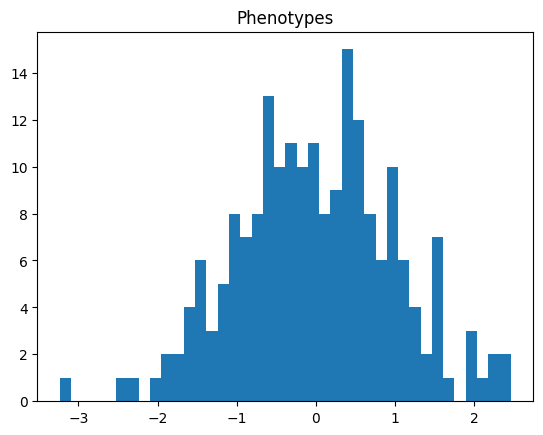

Mean of phenotypes: -8.881784197001253e-18
Standard deviation of phenotypes: 1.0


In [5]:

plt.hist(phenotypes["phenotype"], bins=40)
plt.title("Phenotypes")
plt.show()
print("Mean of phenotypes: " + str(phenotypes['phenotype'].mean()))
print("Standard deviation of phenotypes: " + str(phenotypes['phenotype'].std()))

Now, we demonstrate a case where the function uses default values set for the parameters instead of custom values.

In [6]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

heritability = 0.33

phenotypes_default = sim_phenotypes(grg_1, heritability=heritability)


The initial effect sizes are 
     mutation_id  effect_size  causal_mutation_id
0             43    -2.409922                   0
1             49    -0.221536                   0
2             54    -0.286223                   0
3             55     1.130099                   0
4             67     0.052173                   0
..           ...          ...                 ...
995        10798     0.101926                   0
996        10804     1.001745                   0
997        10844    -0.423607                   0
998        10860    -1.222374                   0
999        10888    -1.041588                   0

[1000 rows x 3 columns]
The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0      -4.913229                   0
1                1       2.868130                   0
2                2      -5.209284                   0
3                3     -18.564395                   0
4                4       3.06880

In [7]:
phenotypes_default

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-4.913229,23.022417,18.109188
1,0,1,2.868130,6.175025,9.043155
2,0,2,-5.209284,-12.856742,-18.066026
3,0,3,-18.564395,-8.032772,-26.597166
4,0,4,3.068809,-6.949096,-3.880287
...,...,...,...,...,...
195,0,195,-10.352359,11.919210,1.566851
196,0,196,-0.685674,0.566548,-0.119126
197,0,197,-25.790909,-5.137189,-30.928097
198,0,198,-10.176840,-16.505938,-26.682778


The demo above involved normalizing the phenotypes, which is clearly evident in the plot above since the phenotypes are normalized to have a mean of 0 and a standard deviation of 1. The demo below does not normalize the phenotypes (this is the default case since the normalize phenotype parameter has a default value set to False). The user should set this field to True if they wish to normalize the phenotypes.

In [8]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

model_type = "normal"
mean = 0
var = 1

model = grg_causal_mutation_model(model_type, mean=mean, var=var)

num_causal = 1000

random_seed = 1

normalize_genetic_values_before_noise = True

heritability = 0.33

effect_output_required = True #saves the effect sizes data for each mutation node in a .par file

effect_path = 'univariate_sample_effect_sizes.par'

standardized_output = True

output_path = 'normal_pheno_unmodified.phen' #define the path to be saved at, this output is saved in the file of this name in the same directory

header=True #set header parameter to true if column names are expected in output file

phenotypes = sim_phenotypes(grg_1, model, num_causal, random_seed, normalize_genetic_values_before_noise=normalize_genetic_values_before_noise, heritability=heritability, save_effect_output=effect_output_required, effect_path=effect_path, standardized_output=standardized_output, path=output_path, header=header)


The initial effect sizes are 
     mutation_id  effect_size  causal_mutation_id
0             20    -1.810258                   0
1             28     1.151768                   0
2             62     1.681257                   0
3             76     2.346698                   0
4            119    -0.286668                   0
..           ...          ...                 ...
995        10862    -0.221163                   0
996        10874    -1.136983                   0
997        10879    -0.966133                   0
998        10883    -1.402602                   0
999        10889    -0.483777                   0

[1000 rows x 3 columns]
The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0     -16.501664                   0
1                1      -2.454348                   0
2                2     -17.303803                   0
3                3       6.641214                   0
4                4      -8.71021

In [9]:
phenotypes #non-normalized phenotypes

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.375568,0.002852,-0.372716
1,0,1,0.686386,-2.009132,-1.322746
2,0,2,-0.436209,-1.827469,-2.263678
3,0,3,1.373995,0.145807,1.519802
4,0,4,0.213453,0.450758,0.664210
...,...,...,...,...,...
195,0,195,1.819668,-0.601942,1.217726
196,0,196,2.123019,-1.044003,1.079016
197,0,197,1.284972,-2.102763,-0.817791
198,0,198,0.821750,0.520805,1.342555


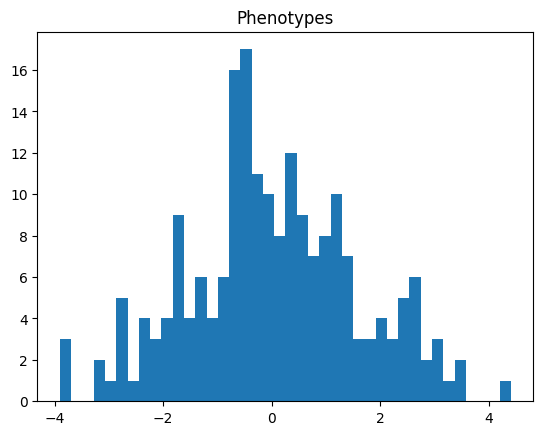

Mean of phenotypes: 0.029793770236794605
Standard deviation of phenotypes: 1.5809545061031


In [10]:

plt.hist(phenotypes["phenotype"], bins=40)
plt.title("Phenotypes")
plt.show()
print("Mean of phenotypes: " + str(phenotypes['phenotype'].mean()))
print("Standard deviation of phenotypes: " + str(phenotypes['phenotype'].std()))

The second demo uses the multivariate normal for multivariate simulation.

In [11]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

model_type = "multivariate normal"
means = np.zeros(2)
cov = np.array([[1, 0.25], [0.25, 1]])

model = grg_causal_mutation_model(model_type, mean=means, cov=cov)

num_causal = 10000

random_seed = 1

h2 = [0.4789, 0.5]

normalize_phenotype = True #set value to true to normalize the final phenotypes

effect_output_required = True #saves the effect sizes data for each mutation node in a .par file

effect_path = 'multi_sample_effect_sizes.par'

standardized_output=True

output_path = 'multi_normal_pheno.phen' #define the path you want it to be saved at, file of this name can be found in the same directory

phenotypes_multi_normal = sim_phenotypes(grg_1, model, num_causal, random_seed, normalize_phenotype=normalize_phenotype, heritability=h2, save_effect_output=effect_output_required, effect_path=effect_path, standardized_output=standardized_output, path=output_path)



The initial effect sizes are 
       mutation_id  effect_size  causal_mutation_id
0                0     0.519955                   0
1                0    -0.835345                   1
2                1    -0.132988                   0
3                1     0.588967                   1
4                2    -1.013731                   0
...            ...          ...                 ...
19995        10890    -1.440376                   1
19996        10891    -0.564984                   0
19997        10891     1.015028                   1
19998        10892    -0.251851                   0
19999        10892    -0.227234                   1

[20000 rows x 3 columns]
The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0       1.158837                   0
1                0      -3.663374                   1
2                1      27.248589                   0
3                1      14.443919                   1
4      

In [12]:
phenotypes_multi_normal

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.426141,1.118938,0.692797
1,1,0,-0.036052,0.945384,0.909332
2,0,1,0.073364,0.391169,0.464533
3,1,1,0.309755,-0.086960,0.222795
4,0,2,0.715085,-0.545658,0.169427
...,...,...,...,...,...
395,1,197,-1.000517,-0.589681,-1.590198
396,0,198,0.388593,0.185581,0.574175
397,1,198,-0.167361,1.051025,0.883664
398,0,199,0.160759,-0.046864,0.113895


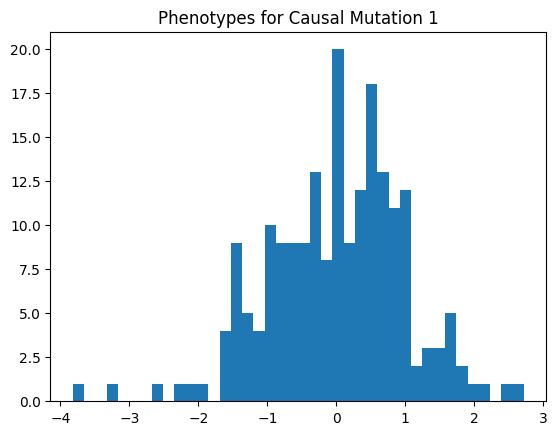

Mean of phenotypes: 3.552713678800501e-17
Standard deviation of phenotypes: 1.0


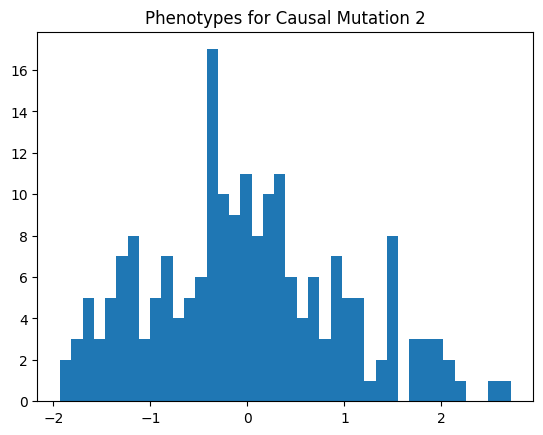

Mean of phenotypes: -4.4408920985006264e-17
Standard deviation of phenotypes: 1.0


In [13]:
df_dict_test = {k: v.sort_values('individual_id') for k, v in phenotypes_multi_normal.groupby('causal_mutation_id')}

num = len(df_dict_test)

for i in range(num):
  temp_df = df_dict_test[i]
  plt.hist(temp_df["phenotype"], bins=40)
  plt.title("Phenotypes for Causal Mutation " + str(i+1))
  plt.show()
  print("Mean of phenotypes: " + str(temp_df['phenotype'].mean()))
  print("Standard deviation of phenotypes: " + str(temp_df['phenotype'].std()))

In [14]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

model_type = "multivariate normal"
means = np.zeros(2)
cov = np.array([[1, 0.33], [0.33, 1]])

model = grg_causal_mutation_model(model_type, mean=means, cov=cov)

num_causal = 10000

normalize_phenotype = True #set value to true to normalize the final phenotypes

random_seed = 1

mean = np.array([0,0])
user_cov = np.array([[1, 0.25], [0.25, 1]])

#heritability feature not used, user-defined noise simulated instead

#by default, a standardized version of the phenotype output will not be saved

phenotypes_multi_normal_non_h2 = sim_phenotypes(grg_1, model, num_causal, random_seed, normalize_phenotype=normalize_phenotype, user_mean=mean, user_cov=user_cov, normalize_genetic_values_after=True)



The initial effect sizes are 
       mutation_id  effect_size  causal_mutation_id
0                0     0.477827                   0
1                0    -0.803153                   1
2                1    -0.106011                   0
3                1     0.576354                   1
4                2    -0.954482                   0
...            ...          ...                 ...
19995        10890    -1.462889                   1
19996        10891    -0.514574                   0
19997        10891     0.978795                   1
19998        10892    -0.258722                   0
19999        10892    -0.235455                   1

[20000 rows x 3 columns]
The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0       0.987169                   0
1                0      -3.570608                   1
2                1      27.554240                   0
3                1      15.451738                   1
4      

In [15]:
phenotypes_multi_normal_non_h2

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.623690,0.036795,-0.586895
1,1,0,-0.081636,-0.019572,-0.101207
2,0,1,0.126756,0.046191,0.172947
3,1,1,0.467747,-0.015795,0.451952
4,0,2,1.018928,0.011495,1.030423
...,...,...,...,...,...
395,1,197,-1.521612,-0.033246,-1.554858
396,0,198,0.555950,-0.010468,0.545482
397,1,198,-0.224837,0.023060,-0.201777
398,0,199,0.267707,0.024364,0.292071
